# Module 2 - describing and representing tabulated data 
-------------------------------------------------------------------------------------------------------

## Table of Content <a id='toc'></a>



1. [Basic description - common summary statistics](#descr1)

2. [Basic representation - plotting one column](#plt1)

[Interlude: multi-panel figures](#multi)

[Exercise 1 - histograms](#ex1)


3. [Accounting for categories in the data](#descr.3)

     3.1 [`groupby`](#descr.3.1)

     3.2 [`catplot`](#descr.3.2)

[Exercice 2 - representing categories](#ex2)

4. [Representing the relationship between 2 numerical variables](#plot2)

5. [Writing plots to disk](#writing)

6. [Free form exercise](#exo)

[Annex - seaborn themes + python graph gallery](#gallery)


Before we begin this chapter in earnest, let's import some libraries and read the data:

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

### This is some configuration to make the plots work better when presenting online
%matplotlib inline

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=20)
###

df = pd.read_table("data/titanic.csv",sep=',') 
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q


<br>
<br>
<br>

[back to ToC](#toc)


## 1. Basic description - common summary statistics <a id='descr1'></a>
-----------------------------------------------------------------------------------------

When doing exploratory analysis of a dataset, it is often useful get some basic statistics on a per-column basis (since rows will typically represent the samples and columns the explanatory variables).

Pandas has a number of methods that can be applied both on an entire DataFrame or on individual columns (Series):
* **`describe()`**: print summary statistics for all **numeric columns** (count, mean, min, max, std, quantiles).
* **`count()`**: returns the count of values (in each column, if applied to a DataFrame), that are not NaN
  (i.e. missing values - Not a Number).
* **`value_counts()`**: returns the count of each value. Useful for discrete variables (e.g. factors).
* `min()`, `max()`, `mean()`, `std()`, `quantile()`, `sum()`: returns the min, max, mean, etc.

When applied to a DataFrame, these method compute values for all columns, skipping columns for which they cannot be applied (e.g. standard deviation can only be computed for numeric columns).

> Note: by default, all these statistics are computed by columns (e.g. max value of all rows in a given column), but they can also be computed by row by adding the `axis=1` argument. E.g. `df.max(axis=1)` returns the max value among columns for each row.

<br>

**Example:** count the number of people that embarked at different ports.
> *Note:* `Embarked` - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [27]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<br>

**Example:** compute the mean, median, min and max fare.

In [28]:
print('mean Fare',df.Fare.mean())
print('median Fare',df.Fare.median())
print('min Fare',df.Fare.min())
print('max Fare',df.Fare.max())

mean Fare 32.205016835016835
median Fare 14.45
min Fare 0.0
max Fare 512.33


<br>

Of course we can combine this with selections:
> **Pro-tip:** note the use of **`~`** to reverse the mask!

In [29]:
mask_male = df.Sex == "male"
print("median fare of male passengers  :", df.Fare[mask_male].median())
print("median fare of female passengers:", df.Fare[~mask_male].median())

median fare of male passengers  : 10.5
median fare of female passengers: 23.0


<br>

These methods can be used on **whole DataFrames**: by default they apply to each column.

In [19]:
df.mean()
# Note: one could use df.mean(axis=1) to compute a mean per row, but it would here be non-sensical

/tmp/ipykernel_876448/1858181437.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Age         29.689076
Pclass       2.308642
Survived     0.383838
Family       0.523008
Fare        32.205017
dtype: float64

We get a `FutureWarning`, letting us know that in the future automatic dropping of non-numerical columns will raise an error. We can correct by explicitly selecting columns:

In [20]:
df[["Age","Pclass","Family","Fare"]].mean()

Age       29.689076
Pclass     2.308642
Family     0.523008
Fare      32.205017
dtype: float64

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 6
* Compute the mean fare for each passenger class (`Pclass`).

</div>

<br>

Another useful method is **`pd.crosstab()`** to create contigency tables. Such tables allow e.g. to look at the relationship between categorical variables:

In [21]:
pd.crosstab(df.Pclass , df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 7
* Using the dataset of single cell data `data/pbmc_data.countMatrix.50.txt.zip`:
  1. Compute the sum for each column.
  2. Normalize each column by dividing its values by the column-wise sum.
  
</div>

In [22]:
df_sc = pd.read_table('data/pbmc_data.countMatrix.50.txt.zip', sep=" ", index_col=0)


<br>

A very useful method of DataFrame to get an **overview of a dataset** is **`df.describe()`**:

In [23]:
df.describe()

,Age,Pclass,Survived,Family,Fare
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.689076,2.308642,0.383838,0.523008,32.205017
std,14.516759,0.836071,0.486592,1.102743,49.693389
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,0.000000,0.000000,7.915000
50%,28.000000,3.000000,0.000000,0.000000,14.450000
75%,38.000000,3.000000,1.000000,1.000000,31.000000
max,80.000000,3.000000,1.000000,8.000000,512.330000


The `df.describe()` function gives information about all numerical columns in the dataset at once (note that non-numerical values are absent here).

It is very useful not only to get a first impression on the dataset, but also to catch eventual errors in the data: a negative number where there should be only positive values, missing values (NAs), ...


<br>

**BUT** the most eagle-eyed among you will have spotted a problem here... what is it? how to solve it ?



In [24]:
# %load solutions/solution_describe.py

<br>

Anyway, back to the matter at hand.

**`.describe()`** gives access to some of the most commonly used summary statistics:
* (arithmetic) **mean** : ${\displaystyle \bar{x}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}}$  or, for coders : `sum(x)/len(x)`
* **standard deviation** (a.k.a. std, stdev) : this corresponds to the average of the absolute difference to the mean. It is the **square root of the variance**.
* **minimum** and **maximum**: smallest and biggest value among the data. Looking at them can help detect outliers.
* **quartiles** : they correspond to the value such that
    * 25% (first quartile, Q1), 
    * 50% (second quartile, Q2, median), or
    * 75% (second quartile, Q3)
    
      of the values are lower than them. They are less sensitive than the mean to outlier values.


<br>
<br>
<br>

[back to ToC](#toc)

## 2. Basic representation - plotting one column <a id='plt1'></a>
-----------------------------------------------------------


It is all nice to be able to display numerical summary numbers, but often data is best explored visually! To this end, there are a number of plotting libraries in python. Here we will mostly be using **matplotlib** and **seaborn**, which are two very popular plotting libraries in python.

* **matplotlib** can be seen as a base library, which defines a lot of low-level plotting functions.
* **seaborn** is built on top of matplotlib, and provides more high-level functions. It's designed to
  interface very well with DataFrames.

We will not delve in all the details of these two libraries, but will instead try to convey elements about their general philosophies and look at their most common functions/arguments. This should give you a head start to get the most out of their very well done tutorial and galleries:
 * [matplotlib](https://matplotlib.org/) - [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) - [gallery](https://matplotlib.org/stable/gallery/index.html)
 * [seaborn](https://seaborn.pydata.org/) - [tutorial](https://seaborn.pydata.org/tutorial.html) - [gallery](https://seaborn.pydata.org/examples/index.html)

<br>

> Note: `pandas` also proposes plotting functions, which are basically also using `matplotlib`. 

<br>



The simplest way to represent the distribution of a set of values using **seaborn** is to use its **`sns.displot()`** function:

> "displot" is shorthand for distribution plot.

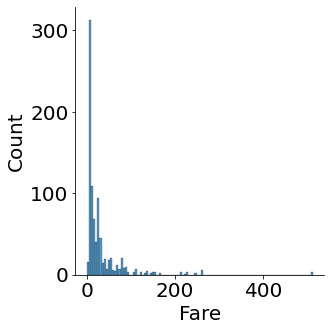

In [42]:
import seaborn as sns

sns.displot(df.Fare)

Ok, that is nice, but tiny... Le'ts make it larger:

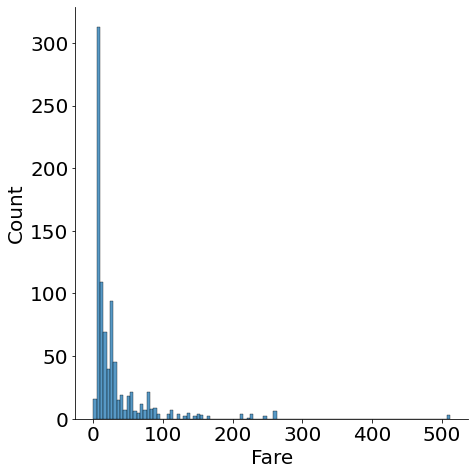

In [53]:
sns.displot(df.Fare , height = 7)

Above, you should now see a histogram (in blue):
* The *x-axis* corresponds to the fare paid by each passenger.
* The *y-axis* corresponds to the **count**: the number of values falling in a given *bin*
  (i.e. a bar of the histogram).

By using the **`kind`** argument, one can change the type of plot:
* `kind="hist"`: histogram (this is the default).
* `kind="kde"`: density line (kernel density estimation).
* `kind="ecdf"`: cumulative distribution function.

<br>

**Example:**

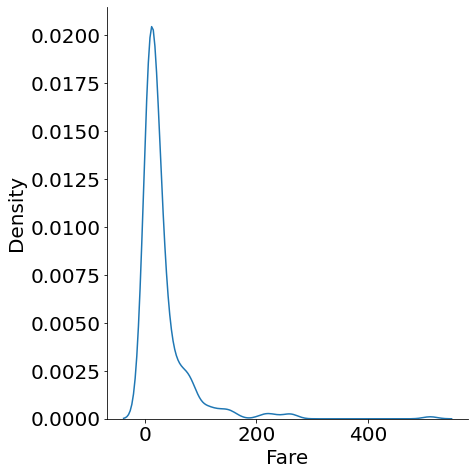

In [54]:
# Note: kde stands for 'kernel density estimation', which is the method used to compute the density line.
sns.displot(df.Fare, kind="kde" , height = 7)

> Note that the y-axis is now in **density** units.

Naturally, `displot()` has many options allowing to combine plot types and pimp your plot.  
For instance, using `kde=True` will superimpose a density line:

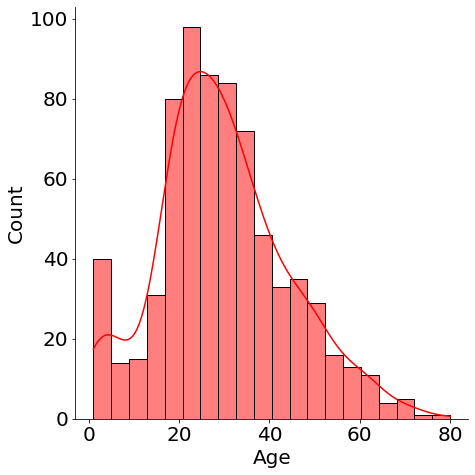

In [55]:
g = sns.displot(df.Age, kde=True, color="red" , height=7)

> *Note:* having both the histogram and the density line switches the y-axis from density to count,
  which is sometimes more interpretable.


`sns.displot()` is what we could call a **figure-level** function:
 * It has several *kind* of representation.
 * It does not play nice in **multi-panel** figures.


[back to toc](#toc)

<br>

### Interlude: multi-panel figures <a id='multi'></a>

We create Multi-panel figures using `matplotlib` command and concepts. 
To make it simple, we call `fig, axes = plt.subplots( nb_rows , nb_cols )`, which creates:
 * `fig`, a `figure` object which controls the whole multipanel figure
 * `axes` : a list containing individual `axe` objects though which we can plot on individual panels of the figure


[<AxesSubplot:> <AxesSubplot:>]


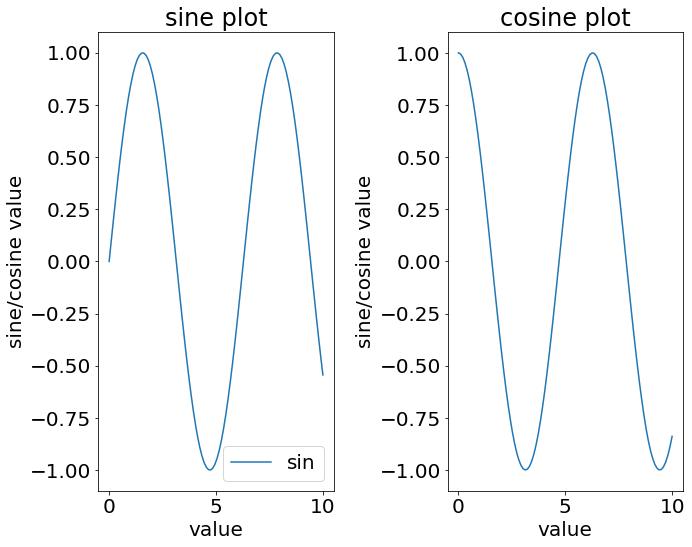

In [50]:

# Create a list of 100 evenly spaced points between 0 and 10.
x = np.linspace(0, 10, 100) 

# Create a figure with multiple panels: 1 row, 2 columns
fig, axes = plt.subplots( 1, 2 , figsize=(10,8))

print( axes ) # axes is a list of two axes objects

## plotting on the first axe == left panel
axes[0].plot(x, np.sin(x), label='sin')
axes[0].set_title("sine plot")
axes[0].set_xlabel("value")
axes[0].set_ylabel("sine/cosine value")
axes[0].legend()

## plotting on the second axe == right panel
axes[1].plot(x, np.cos(x), label='cos')
axes[1].set_title("cosine plot")
axes[1].set_xlabel("value")
axes[1].set_ylabel("sine/cosine value")

plt.tight_layout() ## this creates a more harmonious organization of the different panels
plt.show()

<br>

### back to data representation ...

The different `kind` (histogram, kde, ecdf) of `sns.displot()` can all be called individually using their own functions : `histplot()`, `kdeplot()`, `ecdfplot()`. 

In contrast to `sns.displot()` which is **figure-level**, these more-specialized functions are **axe-level**: they play nicely in a multiple panel context.

They interface with `matplotlib`'s axes using the `ax` argument.


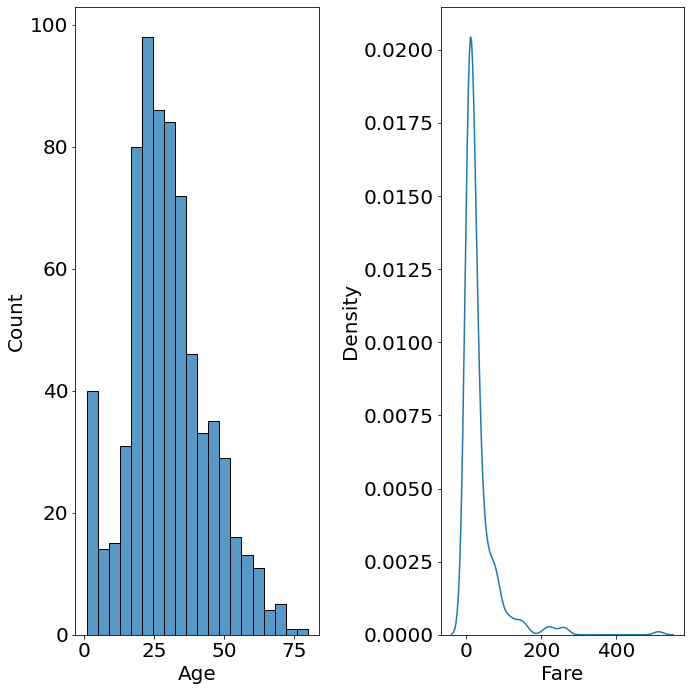

In [51]:
# Creating multiple panels: 1 row, 2 columns
fig, axes = plt.subplots(1, 2)

# Plotting on the first axe == left panel
sns.histplot(df.Age ,ax = axes[0])

# Plotting on the second axe == right panel
sns.kdeplot(df.Fare ,ax = axes[1])

plt.tight_layout()   # This creates a more harmonious organization of the different panels
plt.show()

<br>

In **histogram**, a different number of *bins* shows different aspects of the distribution of your data and so it is important to choose one that is appropriate to your sample size and data. 

By default, seaborn automatically infers the number of *bins*. 
You may stick with the original or change it:

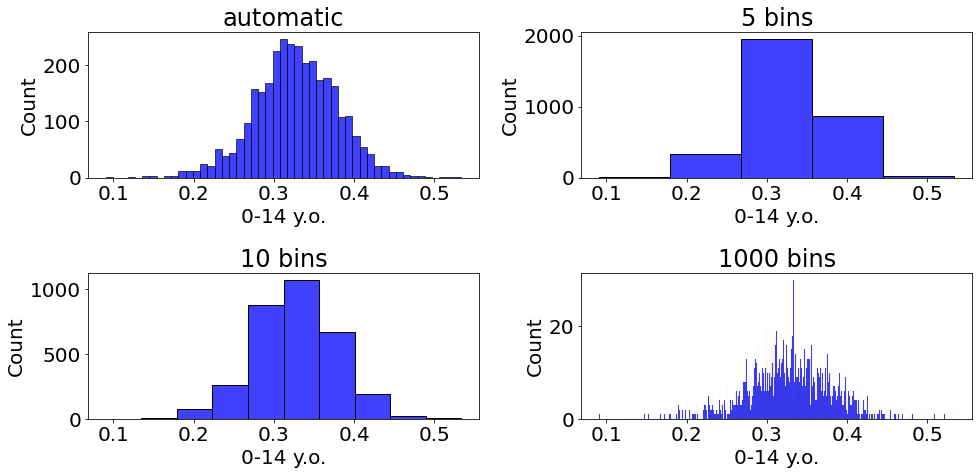

In [56]:
# Let's play with a different dataset for this example.
dfFractions = pd.read_table("data/census1880_fractions.csv", sep=",")

# Set up a figure with multiple panels, here a 2 by 2 grid.
f, axes = plt.subplots( 2, 2, figsize=(14, 7) )

# axes is now a list of list of axes, to represent the 2d nature of our panels:
#  [ [<axe>,<axe>] ,
#    [<ax>,<axe>]]


# then you can specify where each plot goes on the figure with the ax argument of the ([0,0] is the top left corner)

# Plot a simple histogram with binsize determined automatically
sns.histplot(dfFractions['0-14 y.o.'], kde=False, color="b",
             ax=axes[0, 0]).set_title('automatic')

# Plot a simple histogram with binsize 5, 10 , 1000
sns.histplot(dfFractions['0-14 y.o.'], bins=5   , kde=False, color="b", ax=axes[0, 1]).set_title('5 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=10  , kde=False, color="b", ax=axes[1, 0]).set_title('10 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=1000 , kde=False, color="b", ax=axes[1, 1]).set_title('1000 bins')

plt.tight_layout()# this makes the panels margins and setup more graceful


So, to recap, we use `sns.histplot` instead of `sns.displot` : 
 * `histplot` : gives a lower-level kind of plot which is easier to manipulate in multiple figure.
 * `displot` : high-level function, with a lot of capabilities, but does not play nice if not the top figure.
     


<br>

We can combine graphical elements coming from `matplotlib` and `seaborn` quite seamlessly.

Here is a more advanced example where I represent the the **mean**, the **median** and the **mode** of a distribution on top of an histogram.


In [57]:


# Define a small function that plots a distribution, along with its mean median and mode.
def plotWithMeanMedianMode( dat , ax):
    """ 
        Takes:
         * dat: a pandas series
         * ax : a matplotlib axe    
    """
    mode=dat.mode()[0] #we only select the first mode
    mean=dat.mean()
    median=dat.median()

    sns.histplot( dat , kde=True , ax=ax) # line for histogram and density line

    ax.axvline(mean, color='r', linestyle='--' , label='Mean')
    ax.axvline(median, color='g', linestyle='-' , label='Median')
    ax.axvline(mode, color='b', linestyle='-' , label='Mode')
    ax.legend()


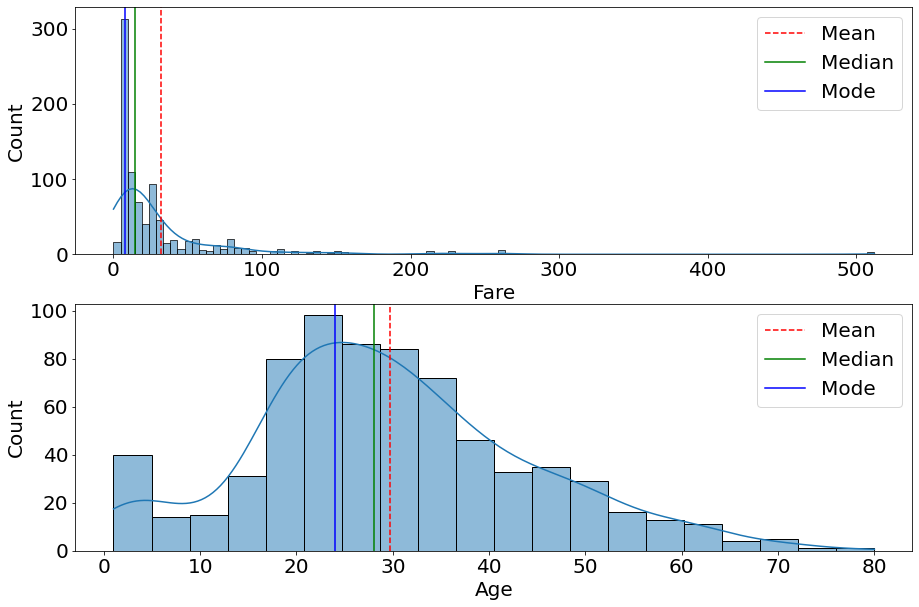

In [58]:
f, axes = plt.subplots( 2, 1, figsize=(15, 10) )

plotWithMeanMedianMode( df.Fare , ax=axes[0])
plotWithMeanMedianMode( df.Age , ax=axes[1])
plt.show()

Of note here :
 * `axvline`: create a vertical line.
 * `label`: legend label associated with the element created by this function.
   Common to a lot of matplotlib plotting functions.
 * `ax.legend()`: makes the legend appear.
 
> You can specify where the legend goes with `loc=` one of `{'best', 'upper left', 'upper right', 'lower left', 'lower right', 'upper center', 'lower center', 'center left', 'center right', 'center'}` or a `(x,y)` tuple  (more options to manually specify elements in the `help()`)


<br>
<br>

[back to ToC](#toc)

### Exercise 1 - histograms <a id='ex1'></a>

Using the Titanic dataset:

1. Plot the `Age` distribution among first class passengers. Try to choose an appropriate mode of 
   representation (histogram? density line? number of bins?).
2. Make a figure with 3 panels. In the panels, plot the histogram of the `Fare` among passengers in
   the first, second, and third class, respectively.


Solutions:

In [ ]:
# %load -r 1-6 solutions/solution_01_02.py
# 1. Plot the Age distribution among first class passengers. Try to choose an appropriate mode of representation (histogram? density line? number of bins?)


In [ ]:
# %load -r 7- solutions/solution_01_02.py
#2. Make a figure with 3 panels. In the panels, plot the histogram of the `Fare` among passengers in
#   the first, second, and third class, respectively.

<br>
<br>

[back to ToC](#toc)

## 3. Accounting for categories in the data <a id='descr.3'></a>


Here the categories would be the passenger class of sex, but depending on data-sets they could be a genotype (Wild-Type versus KO), sex, experimental condition, ...

Of course, we could manually compute the means and plot an histogram for each category in our data-set, but pandas and seaborn offer much more efficient routines for this.


### 3.1 `groupby` <a id='descr.3.1'></a>

Computing a summary statistics on a pandas DataFrame is done **using the `df.groupby(...)` method and the applying some function** to the result of that grouping.

In [59]:
grouped = df.groupby('Sex')     # grouping by Sex.
grouped['Age'].median()         # median age.

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

So we get the median age per Sex. 

<br>

Of course here there are only two categories, but this gets very interesting when there is a lot of categories.

Remember our swiss census from 1880?


In [60]:
df_census = pd.read_table("data/swiss_census_1880.csv", sep=",")

grouped = df_census.groupby("canton name")
grouped["Catholic"].sum()                     # number of catholics per canton in 1880.

canton name
Aargau                               88893
Appenzell Ausserrhoden                3694
Appenzell Innerrhoden                12294
Basel-Landschaft                     12109
Basel-Stadt                          19288
Bern / Berne                         65828
Fribourg / Freiburg                  97113
Genève                               51557
Glarus                                7065
Graubünden / Grigioni / Grischun     41711
Luzern                              129172
Neuchâtel                            11651
Nidwalden                            11901
Obwalden                             15078
Schaffhausen                          4154
Schwyz                               50266
Solothurn                            63037
St. Gallen                          126164
Thurgau                              27123
Ticino                              130017
Uri                                  23149
Valais / Wallis                      99316
Vaud                                 18170

<br>

<div class="alert alert-block alert-success">
 
### Micro-Exercise:
* Make a copy of the `df` data frame with `df.copy()`. Name it `dfc`, as shown here:
```python
dfc = df.copy()
```

* Add a new column named "Age_category" to `dfc`. Make use of the `age_category` function defined below
  to classify passengers into their respective age classes.
```python
def age_category(x):
    age_classes = {"child": 12, "teenager": 17, "adult": 64, "senior": 200}
    for label, threshold in age_classes.items():
        if x <= threshold:
            return label
```

* Compute survival rates by gender, age category and passenger class.

</div>

In [61]:
dfc = df.copy()
def age_category(x):
    age_classes = {"child": 12, "teenager": 17, "adult": 64, "senior": 200}
    for label, threshold in age_classes.items():
        if x <= threshold:
            return label


<br>

[back to ToC](#toc)

### 3.2 `catplot` <a id='descr.3.2'></a>

Computing these summary statistics is all good, but you can also vizualize them using `seaborn` argument `hue` : 



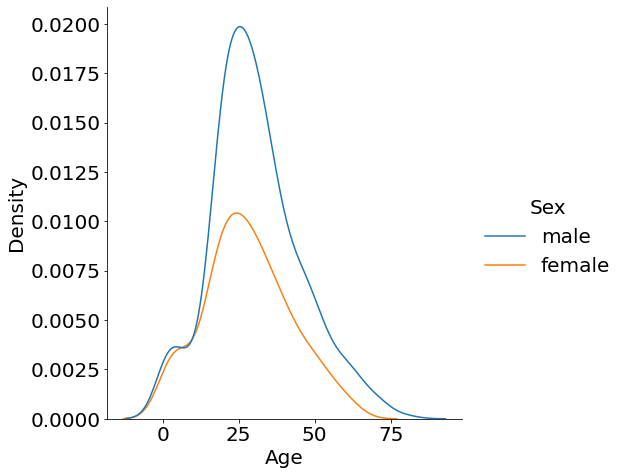

In [63]:
sns.displot( x='Age', hue='Sex', data=df, kind='kde' , height=7)

`hue` is quite ubiquitous in seaborn functions, and lets you determine a categorical column by which you want to split your representation.

Note how we switched our syntax too: we now use column names, with a `data=` argument specifying from which `DataFrame` the data comes.

<br>

The default seaborn scheme is fairly nice, but maybe you want to change it :


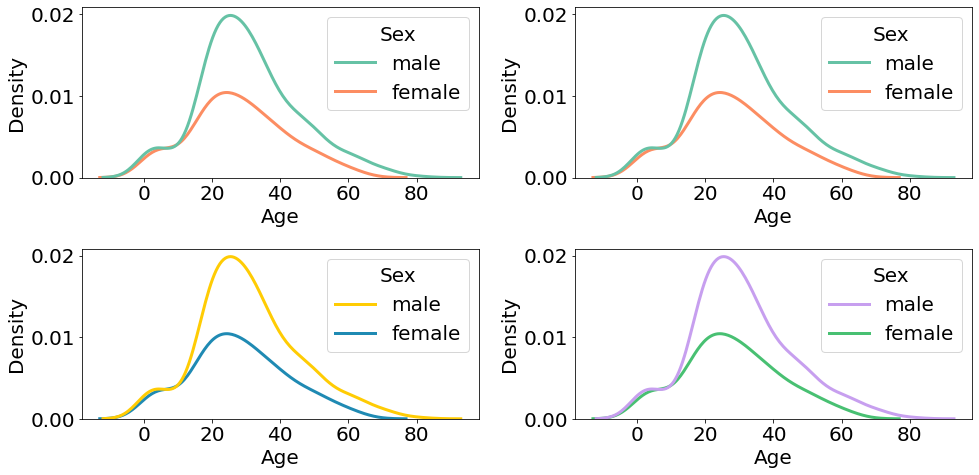

In [65]:
f, axes = plt.subplots( 2, 2, figsize=(14, 7) )

# default
sns.kdeplot( x='Age' , hue = 'Sex' , linewidth=3, data=df , ax = axes[0][0])

# using an existing seaborn palette
sns.set_palette(sns.color_palette('Set2'))
sns.kdeplot( x='Age' , hue = 'Sex' , data=df , linewidth=3, ax= axes[0][1])


# setting manually, with hex values
sns.kdeplot( x='Age' , hue = 'Sex' , data=df , linewidth=3, ax= axes[1][0] , 
           palette = ['#FFCC04','#1F8AB3'])


# setting semi manually, using the xkcd palette https://xkcd.com/color/rgb/
sns.kdeplot( x='Age' , hue = 'Sex' , data=df , linewidth=3, ax= axes[1][1] , 
           palette = [ 'xkcd:lavender' , 'xkcd:dark mint' ])

plt.tight_layout()

> *Note:* use `linewidth=` to get wider/narrower lines

You can learn more on all the options there :
 * [matplotlib colors](https://matplotlib.org/stable/tutorials/colors/colors.html)
 * [seaborn colors](https://seaborn.pydata.org/tutorial/color_palettes.html)
 

<br>

Sometimes, the `displot` options don't really cut it, perhaps because you have many diffrent categories, or maybe because you want to have more than one column to do the categorization.

This is when **`sns.catplot()`**, another **figure-level** function with a lot a `kind`, saves the day!


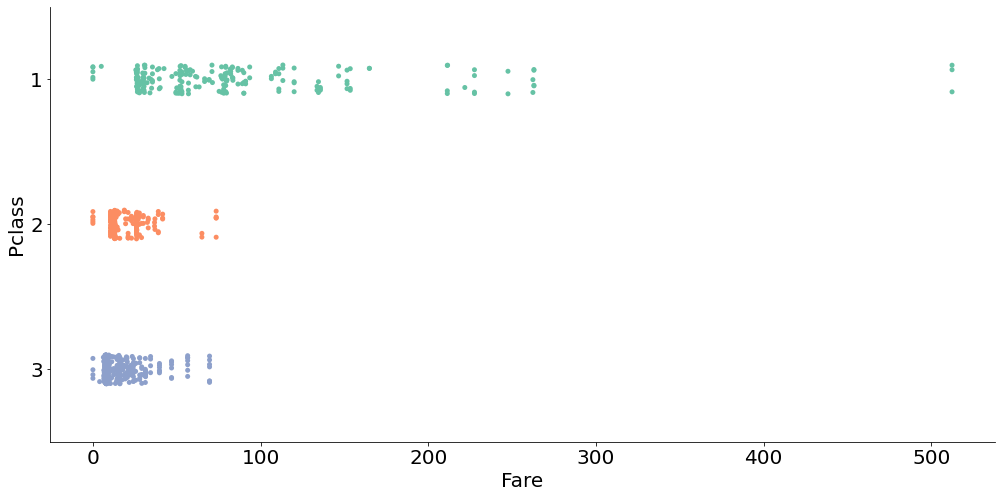

In [66]:
sns.catplot( x='Fare' , y = 'Pclass' ,
            orient='horizontal' , 
            data=df , aspect = 2.0 , height = 7)

Like `sns.displot`, `sns.catplot` is a master function which is designed to create a full figure at once rather than be embedded in a larger figure. 

This is why its arguments are a bit different when it comes to setting the figure *height and width*, which is done using :
 * `height` : height of the figure (no trick there)
 * `aspect` : width/height ratio of the figure ( high aspect -> wider figure )

The `kind` argument let's you control the overall look of the plot. I
It can be:
* 'strip' : this is the default, showing all data points. 
* **'box'** : the famous boxplot
* **'violin'** : an alternative to the boxplot using density lines
* **'bar'** : the (in)famous barplot
* 'swarm' : similar to 'strip' but with another way of aranging the points
* 'boxen' : some intermediary between a boxplot and a violin plot
* 'point' : alternative to the barplot where only the top point is shown



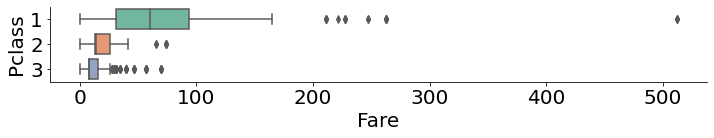

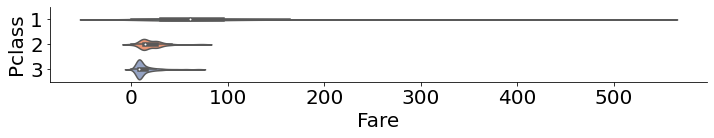

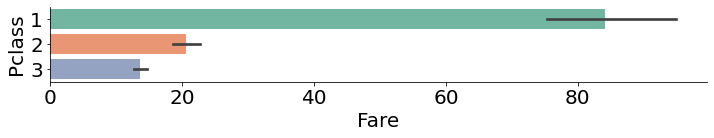

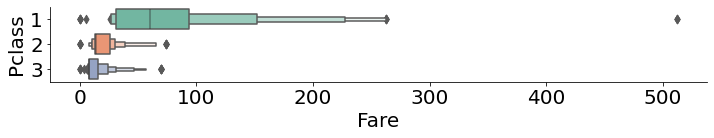

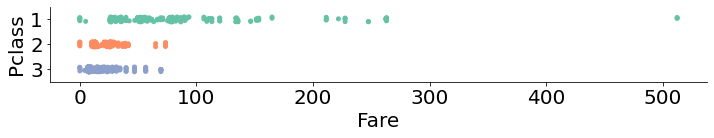

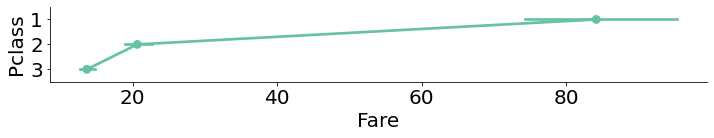

In [67]:
kinds = ['box','violin','bar','boxen','strip','point']  #,'swarm'] # swarm takes a long time to compute

for i,k in enumerate(kinds):
    sns.catplot( x='Fare', y='Pclass', orient='horizontal', data=df, kind=k, aspect=5 , height=2)


So here we can see:
 * **boxplot:** represent quartiles and a few other things
 * **violinplot:** density line plot with an (optional) boxplot in the center 
 * **barplot:** just shows the mean + an error bar (by default 95% CI computed using bootstrapping)
 * **boxen:** the unholy child of a boxplot and a violinplot
 * **strip:** the default, shows the points (super nice, except when you have a lot of points)
 * **point:** basically a barplot without bars and a line between categories

Given all this, one can reasonnably ask the question : **which one is the *best* ?**

While the answer is not clear about the best way to represent a distribution over one or multiple categories, we definitely have some [good answers regarding bad/misleading ways](https://stekhoven.shinyapps.io/barplotNonsense/) (hint, barplot does not shine).  




<br>

Anyhow the `hue` argument can also be used here to great effect:

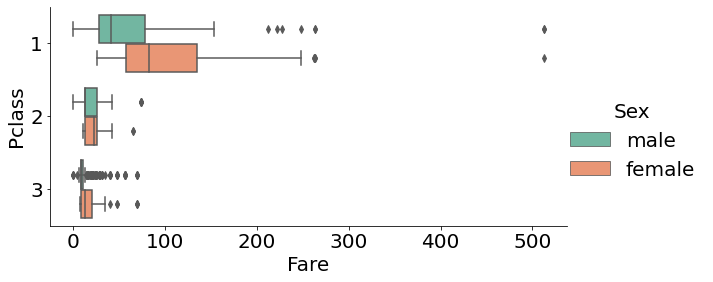

In [68]:
sns.catplot( x='Fare' , 
            y = 'Pclass' , 
            hue='Sex' , 
            orient='horizontal' , 
            kind='box', data=df , aspect = 2.0 , height = 4)
## it is also very nice with kind='point'

<br>

[Back to ToC](#toc)

### Exercice 2 - representing categories <a id="ex2"></a>

Using the 1880 swiss census data:

1. compute a new column "fraction60+" representing the fraction of 60+ years old people in each town.
    **hint :** column `'60+ y.o.'` contains the number of 60+ years old ; column `'Total'` contains
    the total number of inhabitant
    
2. Represent the proportion of people more 60 years old (`'60+ y.o.'`) across all cantons.
   Choose the most appropriate kind of plot.

In [71]:
df_census = pd.read_table("data/swiss_census_1880.csv", sep=",")
df_census.head()

,Year,town number,town name,Total,Swiss,Foreigner,Male,Female,0-14 y.o.,15-59 y.o.,...,German speakers,Franch speakers,Italian speakers,Romansche speakers,Non-national tongue speakers,district number,district name,canton number,canton,canton name
0,1880,1,Aeugst,646,627,19,319,327,217,379,...,645,0,1,0,0,101,Affoltern,1,ZH,Zürich
1,1880,2,Affoltern am Albis,2201,2088,113,1055,1146,713,1331,...,2193,5,3,0,0,101,Affoltern,1,ZH,Zürich
2,1880,3,Bonstetten,771,754,17,361,410,266,449,...,771,0,0,0,0,101,Affoltern,1,ZH,Zürich
3,1880,4,Hausen,1363,1305,58,640,723,343,884,...,1342,12,9,0,0,101,Affoltern,1,ZH,Zürich
4,1880,5,Hedingen,907,867,40,448,459,255,567,...,893,0,9,0,5,101,Affoltern,1,ZH,Zürich


In [81]:
# %load -r 1-5 solutions/solution_01_03.py
# 1.  compute a new column "fraction60+" representing the fraction of 60+ years old people in each town.

In [80]:
# %load -r 6- solutions/solution_01_03.py
#2. Represent the proportion of people more 60 years old ('60+ y.o.') across all cantons. 
#   Choose the most appropriate kind of plot.

Of course possibilities are endless. Here is a fancy one, inspired by [this](https://seaborn.pydata.org/examples/kde_ridgeplot.html) and its [later correction](https://www.pythonfixing.com/2022/02/fixed-python-seaborn-ridge-plot.html).

In [76]:
# %load solutions/solution_01_03_fancy.py
# fancy solution inspired by  https://seaborn.pydata.org/examples/kde_ridgeplot.html


<br>
<br>

[back to ToC](#toc)

## 4. Representing the relationship between 2 numerical variables <a id="plot2" ></a>


**`sns.scatterplot()`** lets us represent the relationship between two numerical variables.

In [82]:
df = pd.read_table("data/titanic.csv", sep=",") ## just in case we need to re-read  the data

In [83]:
#reset the seaborn default theme
sns.reset_orig()

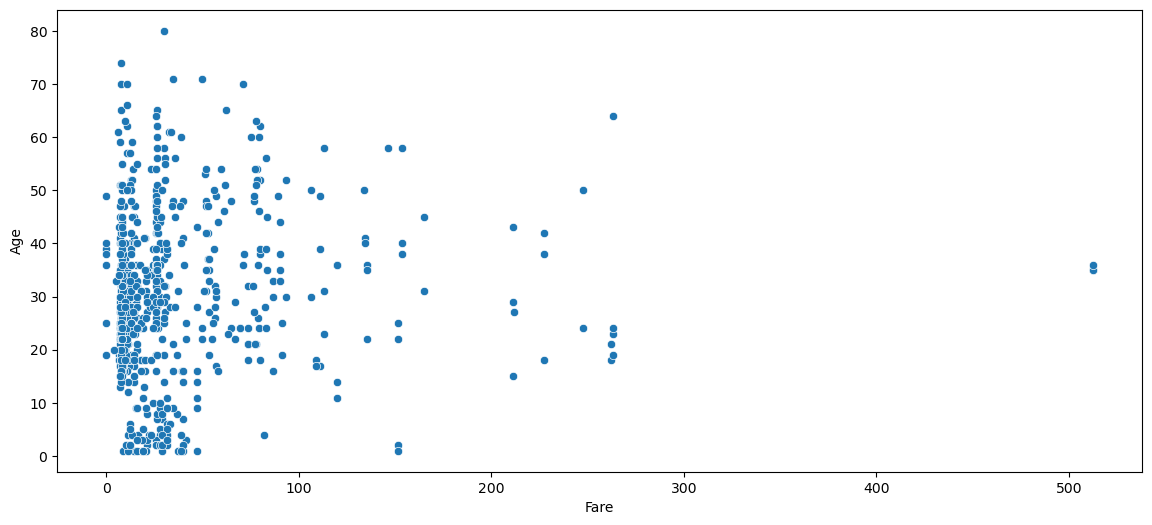

In [84]:
fig = plt.figure(figsize=(14,6))
ax = sns.scatterplot(x='Fare', y='Age', data=df)

OK, it is not so nice... let's set the x-axis to a log scale :

(3, 1000)

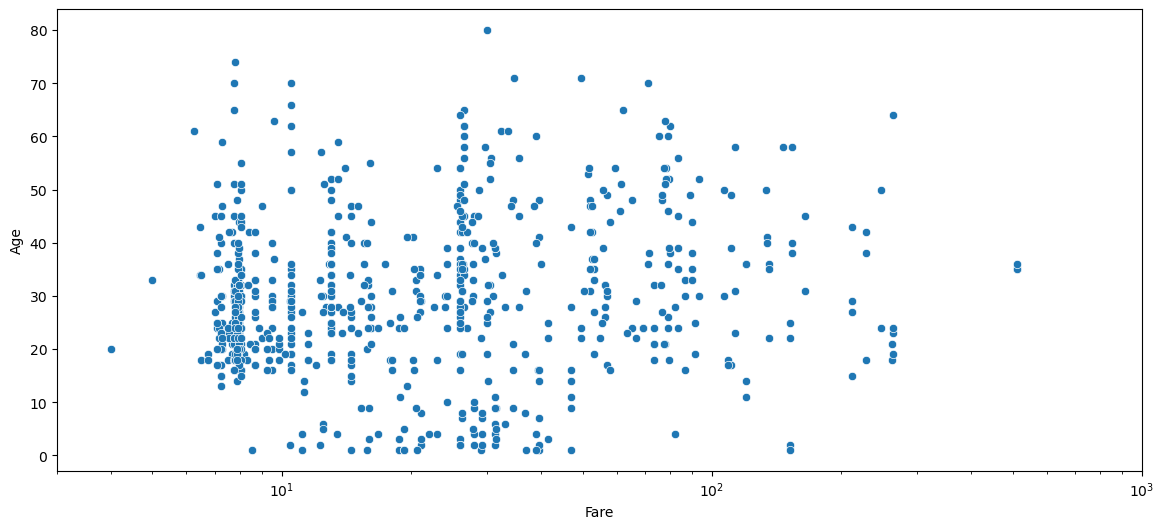

In [85]:
fig = plt.figure(figsize=(14,6))
ax = sns.scatterplot( x = 'Fare' , y = 'Age' , data=df )
ax.set(xscale="log")      # setting axis to log scale.
ax.set_xlim( (3,1000) )   # manually setting the limit of the x axis.

Of course, we can customize :

(3, 1000)

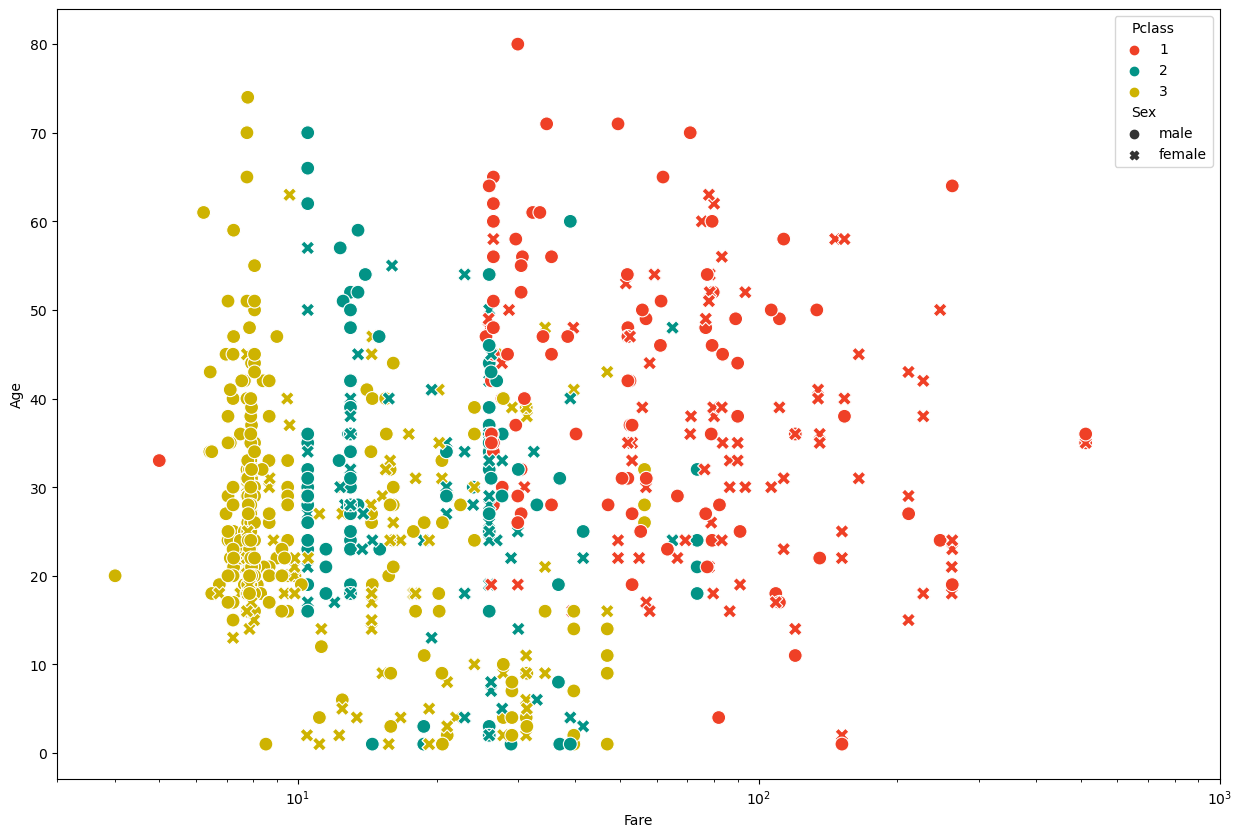

In [86]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot( x = 'Fare' , y = 'Age' , 
                     hue='Pclass' , 
                     palette=['xkcd:tomato',
                              'xkcd:teal','xkcd:mustard'],
                     style='Sex', data=df , s=100 )
ax.set(xscale="log")      # setting axis to log scale.
ax.set_xlim( (3,1000) )   # manually setting the limit of the x axis.


> *Note:* `style=` associates the marker shape to a column.

(3, 1000)

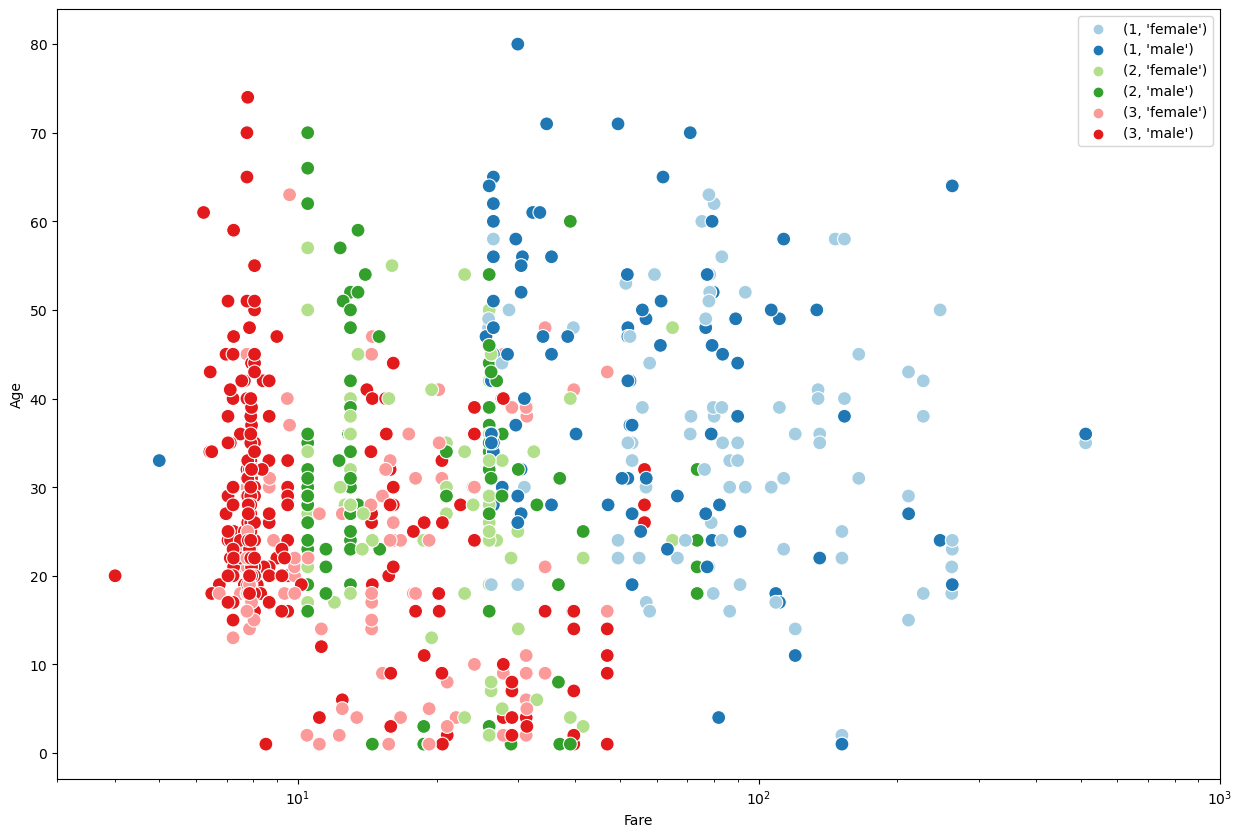

In [97]:
## an alternative with more colors and a single marker adapted from :
#https://stackoverflow.com/questions/62230507/multiple-columns-for-hue-parameter-in-seaborn-violinplot

fig = plt.figure(figsize=(15,10))

## we combine the 2 columns to later apply them as categories
CAT = df[ ['Pclass' , 'Sex' ] ].apply(tuple,axis=1)

ax = sns.scatterplot( x = 'Fare' , y = 'Age' , 
                     hue=CAT,
                     hue_order=sorted( CAT.unique() ), ## handle the order categories in legend
                     palette = sns.color_palette("Paired")[:6] , ## here the paired palette is great
                     data=df , s=100 )
ax.set(xscale="log")      # setting axis to log scale.
ax.set_xlim( (3,1000) )   # manually setting the limit of the x axis.


Finally, a little data exploration trick : **`sns.pairplot()`**

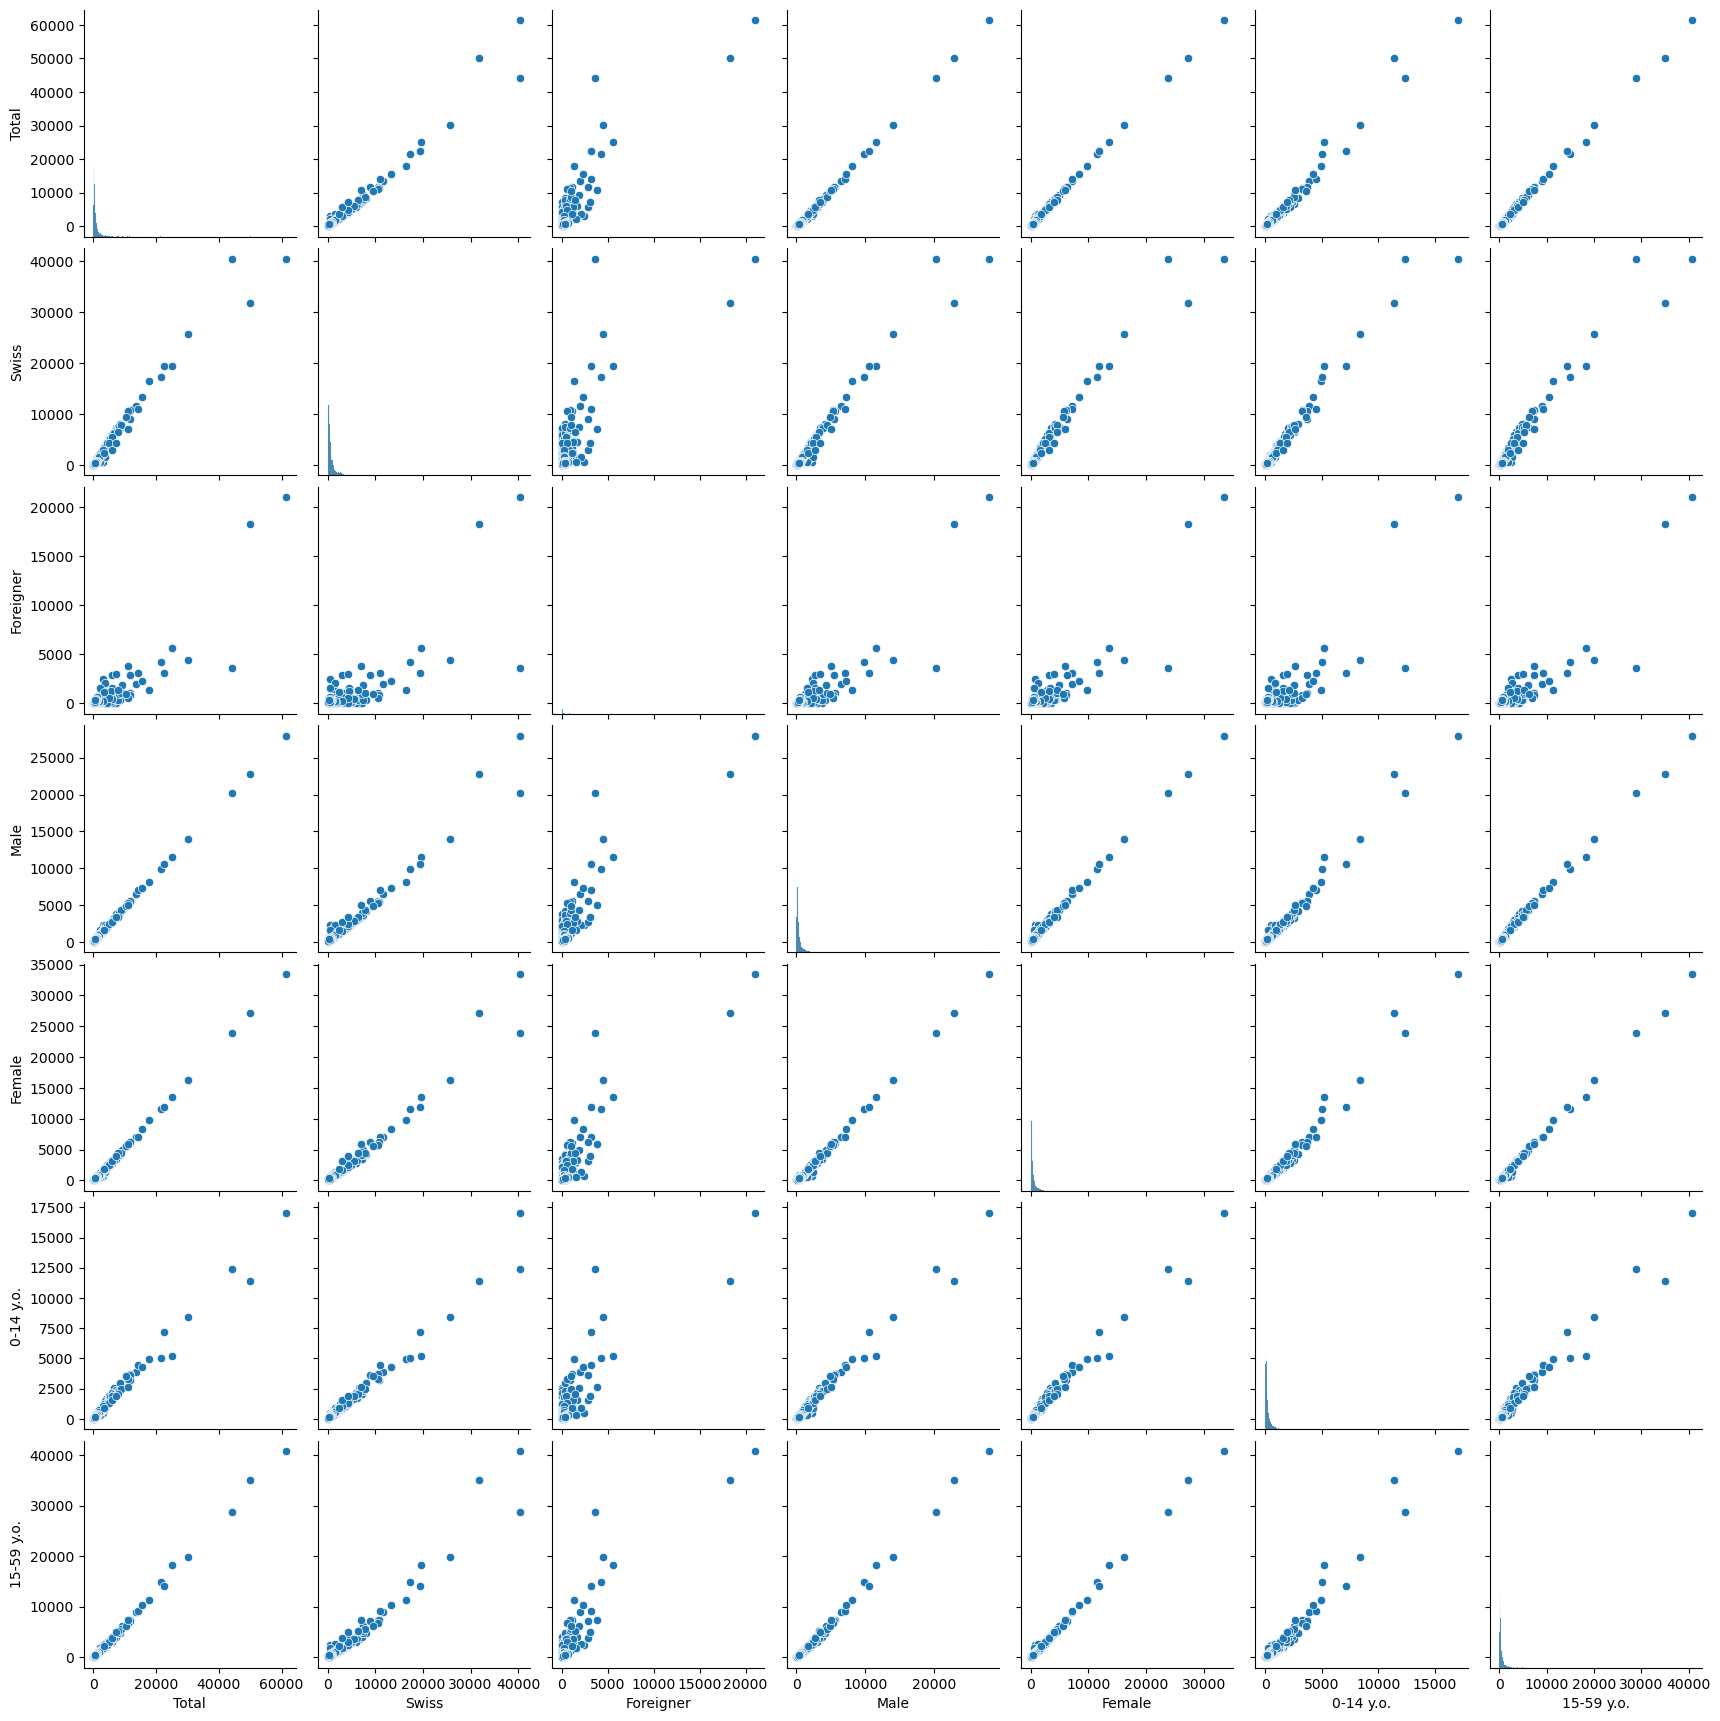

In [98]:
sns.pairplot(df_census.iloc[:,3:10] )

<br>
<br>
<br>

[back to ToC](#toc)


# 5. Writing plots to disk <a id='writing'></a>
------------------------------------------------------------


<br>

To save figures to disk, we rely on the **`savefig()`** method:
* Different output formats can be specified by changing the output file name extension, 
  e.g. `.pdf`, `.svg`, `.jpg`, ...
* For raster formats, the `dpi` argument can be used to define the image quality.
* See `help(plt.savefig)` or [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html?highlight=savefig#matplotlib.pyplot.savefig) for more info.

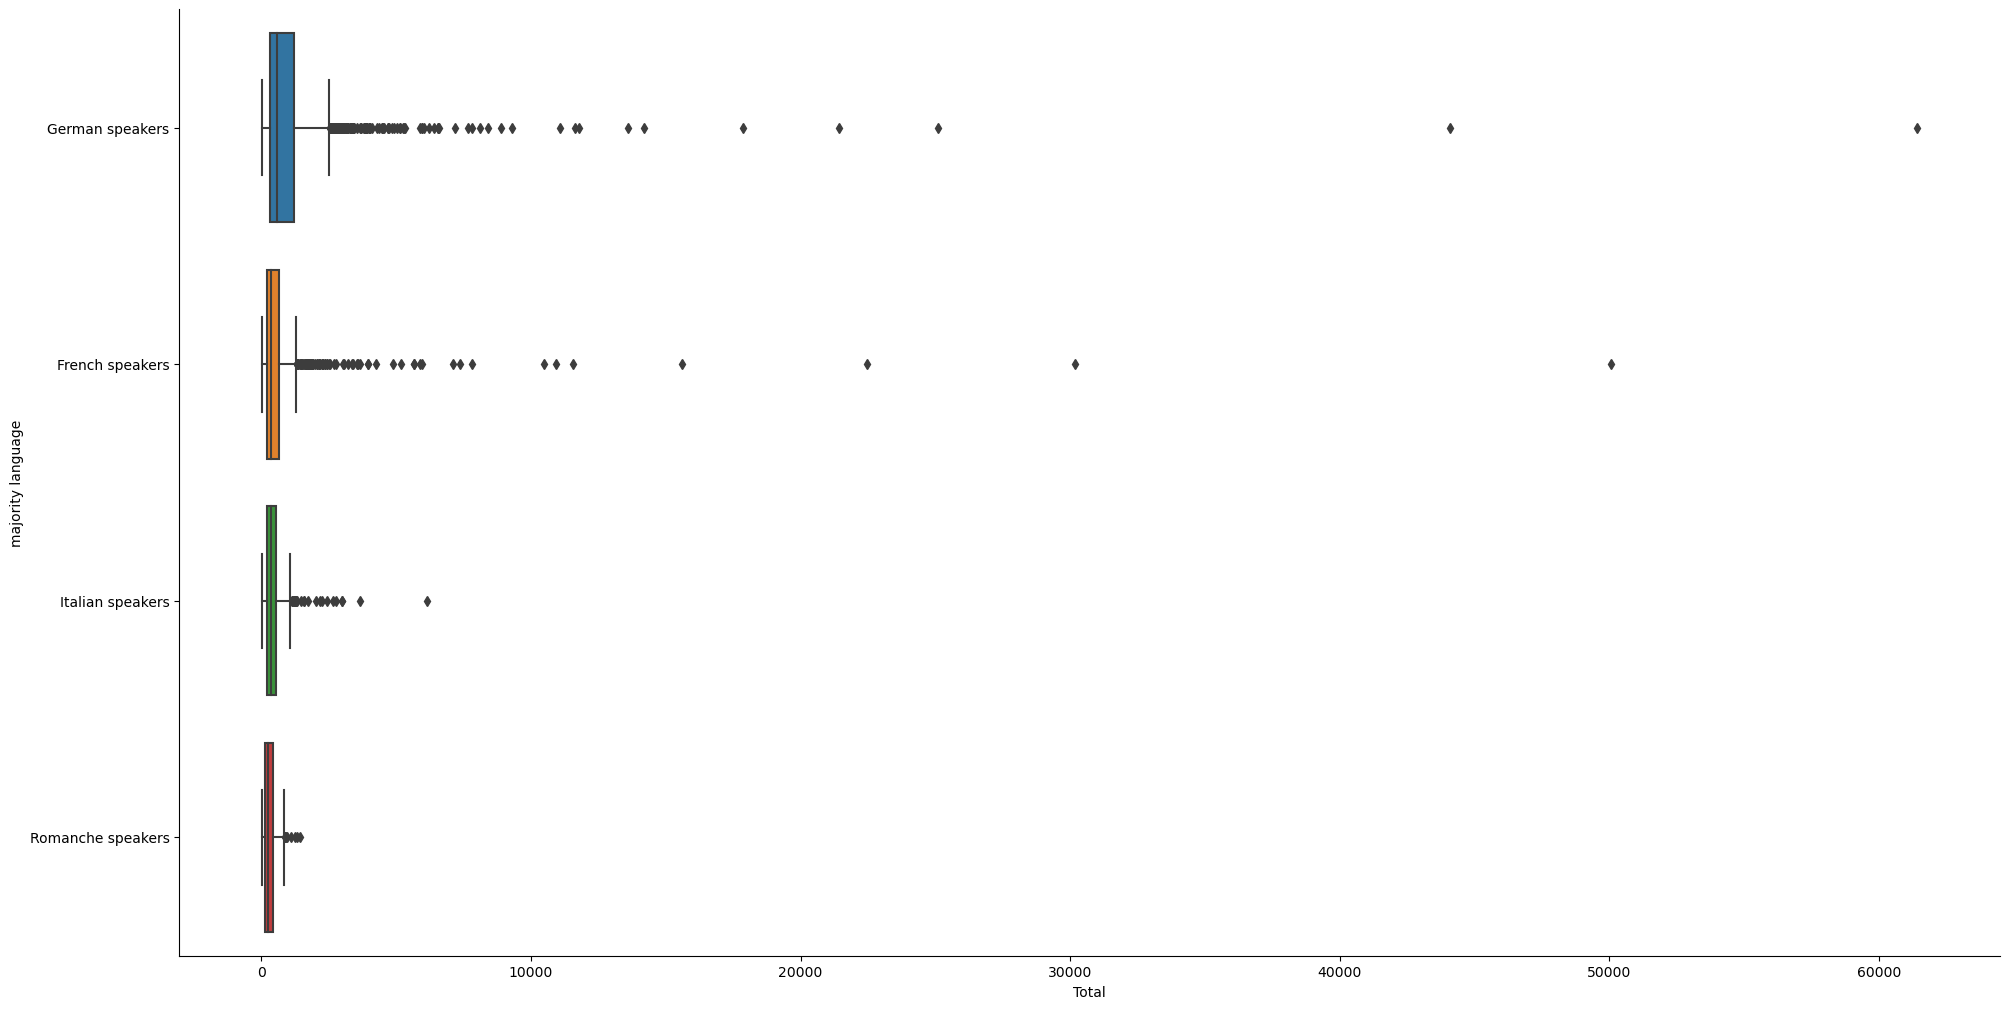

In [99]:
k = "box"

# Make you plot as usual, redirecting it to a variable (my_plot)
represented_variable, category = 'Total', 'majority language'
my_plot = sns.catplot(
    x=represented_variable,
    y=category,
    data=dfFractions,
    kind=k, orient='h', height=10, aspect=2
)

# Save plot to disk, using the savefig() method:
# my_plot.savefig("output.png")

In [ ]:
help(plt.savefig)

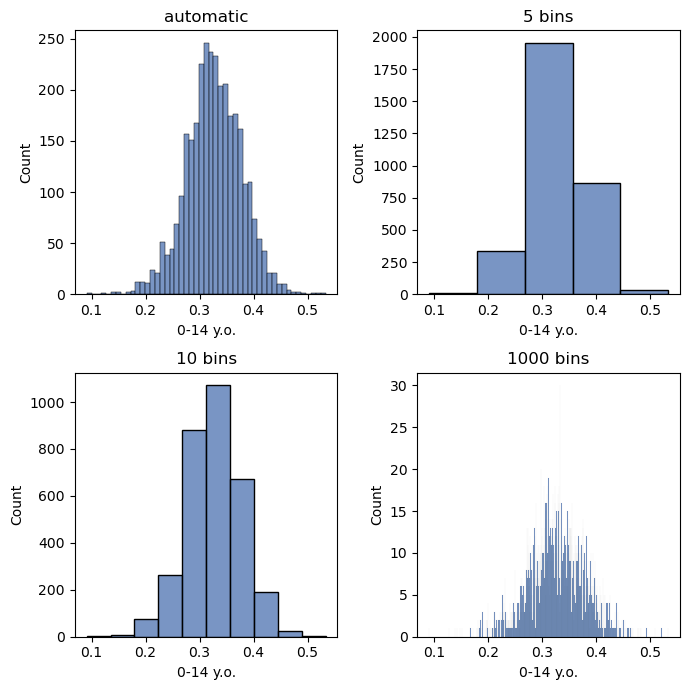

In [100]:
# For multipanel figures:
f, axes = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(dfFractions['0-14 y.o.'], kde=False, color="b", ax=axes[0, 0]).set_title('automatic')
sns.histplot(dfFractions['0-14 y.o.'], bins=5   , kde=False, color="b", ax=axes[0, 1]).set_title('5 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=10  , kde=False, color="b", ax=axes[1, 0]).set_title('10 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=1000 , kde=False, color="b", ax=axes[1, 1]).set_title('1000 bins')
plt.tight_layout()# this makes the panels margins and setup more graceful

f.savefig('output_multipanel.pdf')

<br>
<br>
<br>

[back to toc](#toc)

# 6. Free form exercise <a id='exo'></a>
---------------------------------

The goal of this exercise is to perform an exploration of some data related to heart disease.

In particular, we want to explore the relationship between a `target` variable - whether patient has a heart disease or not - and several other variables such as cholesterol level, age, ...

The data is present in the file `'data/heartData_simplified.csv'`, which is a cleaned and simplified version of the [UCI heart disease data set](https://archive.ics.uci.edu/ml/datasets/heart+Disease)


### Description of the columns

* age : Patient age in years
* sex : Patient sex
* chol : Cholesterol level in mg/dl. 
* thalach : Maxium heart rate during the stress test
* oldpeak : Decrease of the ST segment during exercise according to the same one on rest.
* ca : Number of main blood vessels coloured by the radioactive dye. The number varies between 0 to 3.
* thal : Results of the blood flow observed via the radioactive dye.
	* defect -> fixed defect (no blood flow in some part of the heart)
	* normal -> normal blood flow
	* reversible -> reversible defect (a blood flow is observed but it is not normal)
* target : Whether the patient has a heart disease or not

### Instructions

As stated earlier, your goal is to explore this data-set. 
One objective of this would be to diagnose eventual problems in this dataset (outliers, strange values) and prepare further statistical analysis and reporting.

To this end you will want to formulate a number of hypothesis that would be interesting to pursue from this data (*e.g.*, is heart disease linked to  cholesterol levels), and gather evidence (plots, summary statistics) explaining why this hypothesis seems to be worth testing for.

> Note : we do not ask you to perform the statistical testing itself. Do it if you feel like it.

We will not provide a particular set of precise questions, but here are a few checkpoints to help you get stared :

* Read the data as a pandas `DataFrame`
* Compute summary statistics for the different variables 
* eventually, do the same for different subset of the data (for instance, grouping by sex)
* use visualization to help you describe the relationship between the different variables
* choose a few associations (2?4?) that seems promising and describe them


## Annex - seaborn themes + python graph gallery <a id="gallery"></a>

Seaborn and matplotlib offer nigh-endless possibilities when it comes to costumizing graph elements.

A simple way to change the general feeling of a figure is to play with [seaborn themes](https://seaborn.pydata.org/tutorial/aesthetics.html), or [matplotlib styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles).

In general, when composing a figure we often do not start from nothing, and work our ways from existing examples.
Here are useful resources to do just that:
- [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html)
- [seaborn gallery](https://seaborn.pydata.org/examples/index.html)
- [python-graph-gallery](https://www.python-graph-gallery.com/)